# 0. 이론 - 머신러닝 구조와 절차

## 0-1. 머신러닝 구조

![구조](images/머신러닝.png)  

### 1. 최소 제곱법 모델 (선형 회귀, linear regression)

최소 제곱법 모델 (선형 회귀)
- 기본적인 직관은 빨간 점(학습데이터)이 있을 때,데이터를 잘 표현하는 선을 얻는 것
- 잘 표현함을 나타내는 수치 : 제곱 오차(가 최소일수록 잘 표현한 것) -> 제곱오차를 최소로하는 계수 찾기!
    - 피처의 개수가 1개일 때 제곱오차
        ![](images/수치.png)
    - 피처의 개수가 n개일 때 제곱오차
        ![](images/수치2.png)

- 제곱오차를 최소로하는 계수 찾는 방법
    1. 정규 방정식 -> 4
    2. 경사하강법 -> 5~7
    3. 특잇값 분해 (다루지않음)

## 0-2. 머신러닝 절차

![](images/머신러닝절차.png)

# 1. 데이터셋 준비하기

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

load_diabetes

<function sklearn.datasets._base.load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)>

In [2]:
data=load_diabetes()     # data와 target을 attribute로 혹은 key처럼 갖음 
print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
data['data']
# data.data    # 동일

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

## 1. return_X_y: 데이터와 타겟 따로 반환 여부

In [3]:
X,y=load_diabetes(return_X_y=True)   
# return_X_y가 True이면 data와 target을 tuple 형태로 받음

In [4]:
print(X)
y

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 2. as_frame: 데이터프레임 형식으로 반환 여부

In [12]:
df = load_diabetes(as_frame=True).data   
# as_frame이 True이면 DataFrame형태로 data와 target을 받게됨
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [13]:
df = load_diabetes(as_frame=True).target
df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

### 모든 데이터셋 as_frame으로 준비

In [28]:
df = load_diabetes(as_frame=True).frame
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [29]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)['frame']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True)['frame']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [31]:
from sklearn.datasets import load_digits

df = load_digits(as_frame=True)['frame']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# 2. 데이터셋 분할하기

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(120).reshape((30, 4)), list(range(30))

print('X의 첫 5개 샘플:\n', X[:5, :], '\n')
print('y의 첫 5개 샘플:\n', y[:5])

X의 첫 5개 샘플:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

y의 첫 5개 샘플:
 [0, 1, 2, 3, 4]


In [33]:
# 데이터 -분할-> 학습 데이터, 테스트 데이터

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1234)

print('데이터셋 분할:', len(X_train), len(y_train), len(X_test), len(y_test), '\n')
print('X_train의 첫 5개 샘플:\n', X_train[:5, :], '\n')
print('y_train의 첫 5개 샘플:\n', y_train[:5])

데이터셋 분할: 20 20 10 10 

X_train의 첫 5개 샘플:
 [[ 88  89  90  91]
 [ 96  97  98  99]
 [  0   1   2   3]
 [  8   9  10  11]
 [108 109 110 111]] 

y_train의 첫 5개 샘플:
 [22, 24, 0, 2, 27]


In [34]:
# 학습 데이터 -분할-> 학습 데이터, 검증 데이터

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.33,random_state=1234)

print('데이터셋 분할:', len(X_train), len(y_train), len(X_val), len(y_val),len(X_test), len(y_test), '\n')
print('X_train의 첫 5개 샘플:\n', X_train[:5, :], '\n')
print('y_train의 첫 5개 샘플:\n', y_train[:5])

데이터셋 분할: 13 13 7 7 10 10 

X_train의 첫 5개 샘플:
 [[88 89 90 91]
 [64 65 66 67]
 [76 77 78 79]
 [24 25 26 27]
 [36 37 38 39]] 

y_train의 첫 5개 샘플:
 [22, 16, 19, 6, 9]


# 3. 전처리 - 스케일링 (fit, transform)


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(120).reshape((30, 4)), list(range(30))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=1234)

In [41]:
from sklearn.preprocessing import StandardScaler

# 표준 스케일링 (표준정규분포 따르도록)
scaler = StandardScaler()

# fit(): X_train 데이터를 이용해 스케일링에 필요한 평균과 표준편차를 계산
scaler.fit(X_train)         
# transform(): X_test 데이터를 훈련 데이터셋에서 계산된 평균과 표준편차를 이용하여 변환
X_test_scaled = scaler.transform(X_test)  # 스케일링

X_test_scaled[:5, :]

array([[-1.10387637, -1.10387637, -1.10387637, -1.10387637],
       [-0.74391669, -0.74391669, -0.74391669, -0.74391669],
       [-1.46383606, -1.46383606, -1.46383606, -1.46383606],
       [-1.82379575, -1.82379575, -1.82379575, -1.82379575],
       [ 1.41584143,  1.41584143,  1.41584143,  1.41584143]])

In [43]:
from sklearn.preprocessing import MinMaxScaler

# 최소-최대 스케일링
scaler = MinMaxScaler()

scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled[:5, :]

array([[0.24137931, 0.24137931, 0.24137931, 0.24137931],
       [0.34482759, 0.34482759, 0.34482759, 0.34482759],
       [0.13793103, 0.13793103, 0.13793103, 0.13793103],
       [0.03448276, 0.03448276, 0.03448276, 0.03448276],
       [0.96551724, 0.96551724, 0.96551724, 0.96551724]])

In [45]:
scaler = MinMaxScaler()
# fit()을 사용하여 주어진 데이터셋의 평균과 표준편차를 계산하고, 
# 그 다음으로 transform()을 사용하여 데이터셋을 표준화
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:5, :]

array([[0.75862069, 0.75862069, 0.75862069, 0.75862069],
       [0.82758621, 0.82758621, 0.82758621, 0.82758621],
       [0.        , 0.        , 0.        , 0.        ],
       [0.06896552, 0.06896552, 0.06896552, 0.06896552],
       [0.93103448, 0.93103448, 0.93103448, 0.93103448]])

# 4. 정규 방정식 (제곱오차 최소로 하는 계수 찾는 방법 1)

정규 방정식: 제곱 오차를 최소화하기 위한 계수를 **미분**을 통해 찾는 방법

![](images/정규.png)

![](images/정규방정식.png)

제곱오차 종류

![](images/제곱오차종류.png)

In [5]:
############ 1. 데이터 전처리
X, y = load_diabetes(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)
y_train = y_train.reshape(-1, 1)  # (296, 1)
y_test  = y_test.reshape(-1, 1)   # (146, 1)
print(y_train.shape)
n_train, n_test = X_train.shape[0], X_test.shape[0]
X_train.shape

(296, 1)


(296, 10)

In [76]:
# 절편 추가 (axis=1: 열방향으로)
X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)

In [77]:
X_train.shape            # y=Xw (11=피처10+절편1)

(296, 11)

In [78]:
############ 2. 제곱 오차(SE) 최소화하는 계수 구하기
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train                    
### @ ---> 행렬 곱 

In [79]:
w.shape # x_train의 열 개수(=피처+1)

(11, 1)

In [80]:
############ 3. 최적화한 계수로 훈련 데이터의 예측값 구하여 MSE구하기 (MSE로 예측도와 정답간의 차이 즉, 유사도 파악)
y_pred_train = X_train @ w
MSE          = (y_pred_train - y_train)**2
MSE          = MSE.mean()
print('학습 데이터셋 MSE:',MSE)

학습 데이터셋 MSE: 2895.739705079693


In [81]:
############ 3. 최적화한 계수로 테스트 데이터의 예측값 구하여 MSE구하기 (MSE로 예측도와 정답간의 차이 즉, 유사도 파악)

# 절편 추가
X_test = np.append(np.ones((n_test, 1)), X_test, axis=1)
# 학습된 하이퍼파라미터로 테스트 데이터 예측
y_pred = X_test @ w
MSE    = (y_pred - y_test)**2
MSE    = MSE.mean()
print('테스트 데이터셋 MSE:',MSE)

테스트 데이터셋 MSE: 2800.20121228027


In [83]:
# RMSE 
np.sqrt(MSE)

52.91692746447274

# 5. 경사 하강법 기본

경사하강법 (gradient descent): 각 점에서 경사 혹은 미분값 (gradient)의 반대 방향으로 이동하여 최소값을 갖는 점으로 근사

![](images/경사하강법.png)

In [84]:
import matplotlib.pyplot as plt

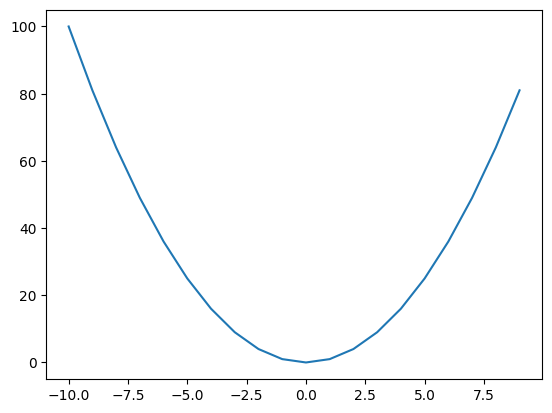

In [85]:
x = np.arange(-10,10,1)
f = x ** 2
plt.plot(x,f)
plt.show()

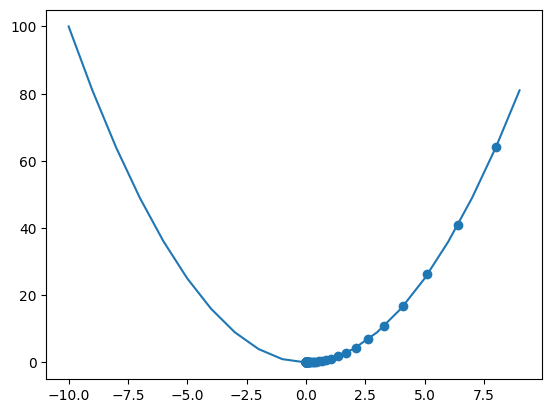

In [87]:
x_new       = 10
X           = []    # 경사하강법으로 이동된 x 좌표
Y           = []    # 경사하강법으로 이동된 y 좌표
learng_rate = 0.1

for i in range(100):
    old_value = x_new
    x_new     = old_value - learng_rate*(2*old_value)
    X.append(x_new)
    Y.append(x_new ** 2)

plt.plot(x, f)      # y=x**2 그래프
plt.scatter(X, Y)   # 경사하강법
plt.show()

# 6. 경사하강법 (제곱오차 최소로 하는 계수 찾는 방법 2)

### 각종 변수와 함수의 정의

**경사하강법 (gradient descent)**

![](images/경사2.png)

- 손실함수 J를 최소화하는 계수를 찾아야함  

- 목적변수 : 주어진 데이터에 대한 예측값 (서윤 정의)  

- 가설함수 : 주어진 데이터에 대해서 목적변수를 유추하는 함수  

- 비용함수 : 데이터별 가설함수 결과 (예측값) 과 실제값의 차이  

- 손실함수 : 비용함수의 평균값  


**경사하강법으로 계수(w)를 업데이트 하기 위해 정규방정식과 동일한 gradient 사용**

    W_new = W_old - a * gradient

![](images/gradient.png)

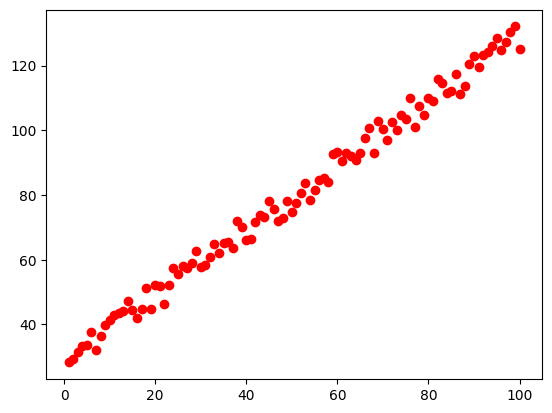

In [89]:
import random

############## 1. 데이터세팅

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1 # 데이터 x의 상수항에는 1
        x[i][1] = i # 데이터 x 값은 1씩 증가시킴
        y[i] =   (i+bias) + random.uniform(0, 1) * variance # 데이터 y에 bias 생성 / y = x[i][1] + b + variance*random(노이즈역할)
    return x, y

x, y = gen_data(100, 25, 10) # 100개의 데이터 생성
plt.scatter(x[:,1]+1, y, color='r') #  데이터 x와 y의 상관관계 그래프 작성
plt.show()

In [93]:
############## 2. 제곱오차 최소화하는 계수찾기 - 경사하강법

def gradient_descent(x, y, theta, alpha, numIterations):
    xTrans    = x.transpose()   # (2, 100)
    cost_list = []
    for i in range(0, numIterations): 
        hypothesis = np.dot(x, theta)   # 가설함수로 예측값 구하기 (100, 1)
        diff       = hypothesis - y     # 예측값과 실제값의 차이 (100, 1)
        loss       = np.sum(diff ** 2) / x.shape[0] # 손실함수
        gradient   = np.dot(xTrans, diff)*2  / x.shape[0] # 그래디언트=손실함수의 미분(2, 1)

        # 경사하강법으로 계수 업데이트
        theta      = theta -alpha * gradient  # 경사하강법으로 계수 업데이트
        if i% 250 == 0: 
            cost_list.append(loss)
    return theta, cost_list     # 하이퍼파라미터, 손실값 리턴

numIterations = 5000    # 하이퍼파라미터 업데이트 횟수 (많을수록 훈련데이터의 답 정확하게 예측)
alpha         = 0.0001  # 스템 사이즈
theta         = np.ones(x.shape[1]) # 초기 하이퍼 파라미터 (w)
theta, cost_list = gradient_descent(x, y, theta, alpha, numIterations)

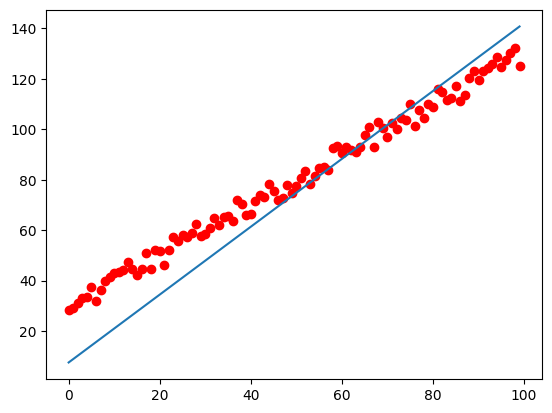

In [97]:
############## 3. 학습된 theta로 예측값 구하여 답과 비교

y_predict = np.dot(x, theta)
plt.scatter(x[:,1],y,color='r')
plt.plot(x[:,1],y_predict)
plt.show()
# numIterations를 늘리면 더 정확하게 predict

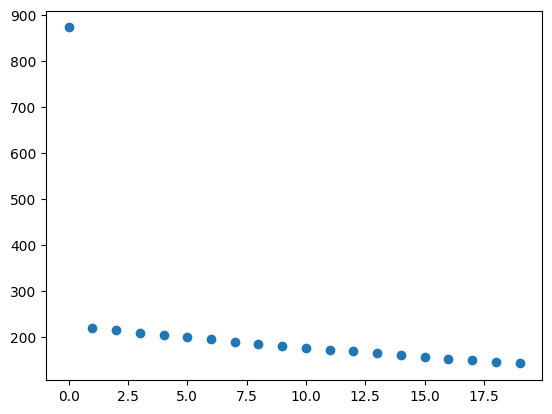

In [96]:
# iteration 진행될때마다 떨어지는 Loss
iterations = range(len(cost_list))
plt.scatter(iterations,cost_list)
plt.show()

# 7. 경사하강법-데이터셋활용 (제곱오차 최소로 하는 계수 찾는 방법 2)

In [101]:
############## 1. 데이터 세팅 및 전처리

X, y = load_diabetes(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1234)

# 절편 위해 추가
X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis=1)

In [102]:
############## 2. 제곱오차 최소화하는 계수찾기 - 경사하강법

numIterations= 10000
alpha = 0.1         # 스텝 사이즈
theta = np.ones(X_train.shape[1])   # 초기 하이퍼파라미터
theta, cost_list= gradient_descent(X_train, y_train, theta, alpha, numIterations) # (5)

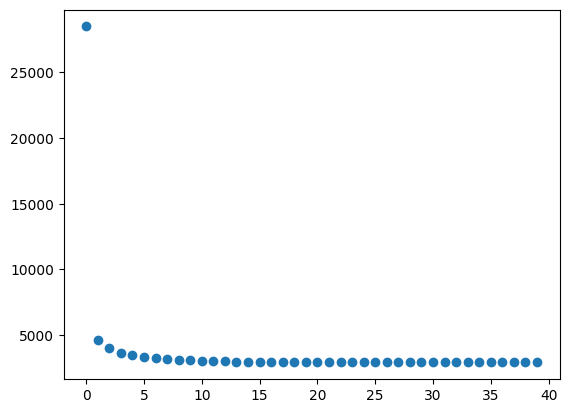

In [103]:
iterations = range(len(cost_list))
plt.scatter(iterations,cost_list)
plt.show()

In [104]:
cost_list[-1]

2914.877171449446

In [105]:
############## 3. 학습된 theta로 test데이터 예측값 구하여 손실 구하기
y_predict = np.dot(X_test, theta)
diff      = y_predict - y_test
cost      = np.sum(diff ** 2) / X_test.shape[0]
cost

2829.172734417122

# 8. sklearn 패키지로 쉽게 해결 (정규방정식, 경사하강법)

sklearn.linear_model.LinearRegression
- reg객체 만든 후
- fit 메소드를 통해 학습하고
- predict 메소드를 통해 예측할 수 있음
- 정규방정식을 통해 얻은 결과를 제공[8] 참고

sklearn.linear_model.SGDRegressor
- stochastic gradient descent (경사 계산하기 위한 데이터를 랜덤하게 지정)
- reg객체 만든 후
- fit 메소드를 통해 학습하고
- predict 메소드를 통해 예측할 수 있음

In [111]:
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1234)

####### 정규방정식[5]으로 학습
reg = LinearRegression()
reg = reg.fit(X_train, y_train)     # 학습 (제곱오차 최소화하도록 계수(w) 업데이트 by 정규방정식(미분=0))
y_pred_train = reg.predict(X_train) # 훈련 데이터 예측값

# 훈련 데이터의 예측값과 손실값의 차이의 절댓값의 평균 (MAE)
print('학습 데이터셋 MAE:',np.abs(y_pred_train - y_train).mean())

# 테스트 데이터의 예측값과 손실값의 차이의 절댓값의 평균 (MAE)
y_pred = reg.predict(X_test)    # 테스트 데이터의 예측값
print('테스트 데이터셋 MAE:',np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE: 43.54887919565905
테스트 데이터셋 MAE: 42.61770102477777


In [112]:
from sklearn.linear_model import SGDRegressor

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1234)

####### 경사하강법[6],[7]으로 학습
# penalty: 규제 방식을 결정하는 매개변수. 기본값은 None. 'l2' 또는 'l1'과 같은 값으로 설정.
# max_iter: 최대 반복 횟수. 경사 하강법의 반복 횟수를 지정하는 것
# learning_rate: 학습률을 결정하는 매개변수. 'constant'로 설정된 경우, eta0 매개변수의 값이 학습률로 사용.
# eta0: 학습률 초기값입니다. 학습률은 모델이 얼마나 큰 단계로 학습하는지를 조절하며, eta0는 학습률이 시작될 때의 값입니다.
reg = SGDRegressor(penalty=None, max_iter=10000, learning_rate='constant', eta0=0.1)
reg = reg.fit(X_train, y_train)     # 학습 (제곱오차 최소화하도록 계수(w) 업데이트 by 경사하강법)
y_pred_train = reg.predict(X_train) # 훈련 데이터 예측값

# 훈련 데이터의 예측값과 손실값의 차이의 절댓값의 평균 (MAE)
print('학습 데이터셋 MAE:',np.abs(y_pred_train - y_train).mean())

# 테스트 데이터의 예측값과 손실값의 차이의 절댓값의 평균 (MAE)
y_pred = reg.predict(X_test)    # 테스트 데이터의 예측값
print('테스트 데이터셋 MAE:',np.abs(y_pred - y_test).mean())

학습 데이터셋 MAE: 49.60248842051199
테스트 데이터셋 MAE: 49.95549437315216


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
